In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_df = pd.read_parquet('../data/curated/final_merchant_statistics')

In [3]:
final_df.head(5)

,merchant_abn,name,tags,tag,revenue_level,take_rate,tot_dollar_value,avg_dollar_value,stddev_dollar_value,tot_discounted_value,...,commission_stddev_tot_dollar_value_daily,commission_avg_tot_discounted_value_daily,commission_stddev_tot_discounted_value_daily,numd_sa2_code,median_weekly_income,returning_customers,unique_customers,avg_tot_dollar_value_customers,stddev_tot_dollar_value_customers,vip_customers
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,7.032777e+05,215.663205,138.039260,6.554602e+05,...,0.002111,1.946912,0.001963,1717.0,794.816023,11.0,3032.0,231.951752,155.424439,137.0
1,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,6.775178e+03,1129.196413,717.988423,6.166115e+03,...,0.165098,0.363251,0.149654,7.0,788.166667,0.0,6.0,1129.196413,717.988423,0.0
2,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,2.519346e+04,340.452204,201.963247,2.342538e+04,...,0.622130,2.555144,0.577294,132.0,797.507171,0.0,73.0,345.115933,203.496326,3.0
3,10648956813,Proin Nisl Institute,"[(computeRs, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.66,1.419600e+06,64.583063,22.112070,1.329626e+06,...,2.702184,146.127248,2.525658,2208.0,825.551750,1574.0,14380.0,98.720466,57.083817,710.0
4,10714068705,Sollicitudin Commodo Ipsum Industries,"([furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.51,4.355100e+05,126.675378,104.490307,4.067113e+05,...,0.270890,16.845635,0.252372,1715.0,796.782831,10.0,3221.0,135.209547,113.737044,145.0


In [4]:
final_df.columns

Index(['merchant_abn', 'name', 'tags', 'tag', 'revenue_level', 'take_rate',
       'tot_dollar_value', 'avg_dollar_value', 'stddev_dollar_value',
       'tot_discounted_value', 'avg_discounted_value',
       'stddev_discounted_value', 'num_order_id', 'num_fraud_order',
       'rate_fraud_order', 'avg_tot_dollar_value_monthly',
       'stddev_tot_dollar_value_monthly', 'avg_tot_discounted_value_monthly',
       'stddev_tot_discounted_value_monthly', 'avg_num_order_id_monthly',
       'stddev_num_order_id_monthly', 'avg_num_fraud_order_monthly',
       'avg_tot_dollar_value_daily', 'stddev_tot_dollar_value_daily',
       'avg_tot_discounted_value_daily', 'stddev_tot_discounted_value_daily',
       'avg_num_order_id_daily', 'stddev_num_order_id_daily',
       'avg_num_fraud_order_daily', 'commission_tot_dollar_value',
       'commission_avg_dollar_value', 'commission_stddev_dollar_value',
       'commission_tot_discounted_value', 'commission_avg_discounted_value',
       'commission_stdde

In [5]:
[
    'merchant_abn', 'name', 'tags', 'tag', 'revenue_level', 
    'take_rate',
    
    'tot_dollar_value', 'avg_dollar_value', 'stddev_dollar_value',
    'tot_discounted_value', 'avg_discounted_value', 'stddev_discounted_value', 
    
    'num_order_id', 'num_fraud_order', 'rate_fraud_order', 
    
    'avg_tot_dollar_value_monthly', 'stddev_tot_dollar_value_monthly', 
    'avg_tot_discounted_value_monthly', 'stddev_tot_discounted_value_monthly', 
    'avg_num_order_id_monthly', 'stddev_num_order_id_monthly', 
    
    'avg_num_fraud_order_monthly', 
    
    'avg_tot_dollar_value_daily', 'stddev_tot_dollar_value_daily',
    
    'avg_tot_discounted_value_daily', 'stddev_tot_discounted_value_daily',
    
    'avg_num_order_id_daily', 'stddev_num_order_id_daily',
    'avg_num_fraud_order_daily', 
    
    'commission_tot_dollar_value', 'commission_avg_dollar_value', 'commission_stddev_dollar_value',
    'commission_tot_discounted_value', 'commission_avg_discounted_value', 'commission_stddev_discounted_value',
    
    'commission_avg_tot_dollar_value_monthly',
    'commission_stddev_tot_dollar_value_monthly',
    
    'commission_avg_tot_discounted_value_monthly',
    'commission_stddev_tot_discounted_value_monthly',

    'commission_avg_tot_dollar_value_daily',
    'commission_stddev_tot_dollar_value_daily',

    'commission_avg_tot_discounted_value_daily',
    'commission_stddev_tot_discounted_value_daily', 

    'avg_tot_dollar_value_customers', 'stddev_tot_dollar_value_customers',
    'returning_customers', 'unique_customers', 'vip_customers',
    'numd_sa2_code', 'median_weekly_income', 
]

['merchant_abn',
 'name',
 'tags',
 'tag',
 'revenue_level',
 'take_rate',
 'tot_dollar_value',
 'avg_dollar_value',
 'stddev_dollar_value',
 'tot_discounted_value',
 'avg_discounted_value',
 'stddev_discounted_value',
 'num_order_id',
 'num_fraud_order',
 'rate_fraud_order',
 'avg_tot_dollar_value_monthly',
 'stddev_tot_dollar_value_monthly',
 'avg_tot_discounted_value_monthly',
 'stddev_tot_discounted_value_monthly',
 'avg_num_order_id_monthly',
 'stddev_num_order_id_monthly',
 'avg_num_fraud_order_monthly',
 'avg_tot_dollar_value_daily',
 'stddev_tot_dollar_value_daily',
 'avg_tot_discounted_value_daily',
 'stddev_tot_discounted_value_daily',
 'avg_num_order_id_daily',
 'stddev_num_order_id_daily',
 'avg_num_fraud_order_daily',
 'commission_tot_dollar_value',
 'commission_avg_dollar_value',
 'commission_stddev_dollar_value',
 'commission_tot_discounted_value',
 'commission_avg_discounted_value',
 'commission_stddev_discounted_value',
 'commission_avg_tot_dollar_value_monthly',
 'com

In [6]:
# Assign the Features to the different challenges of BNPL
feature_dict = {
    # 'exposure': [
    #     'sa2_region_count',
    #     'unique_customers',
    #     'returning_customers',
    # ],
    # 'risk': [
    #     'median_customer_income',
    #     'vip_customers',
    # ],
    'fraud': [
        'stddev_tot_discounted_value_daily',
        'avg_num_fraud_order_daily',
        'avg_discounted_value',
    ],
    # 'performance': [
    #     'take_rate',

    #     'sales_revenue',
    #     'discounted_sales_revenue',

    #     'overall_commission',
    #     'discounted_overall_commission',

    #     'avg_value_per_order',
    #     'discounted_avg_value_per_order',

    #     'avg_commission_per_order',
    #     'discounted_avg_commission_per_order',
        
    #     'avg_monthly_orders',
    #     'avg_monthly_rev',
    #     'std_monthly_revenue',
        
    #     'discounted_avg_monthly_rev',
    #     'std_monthly_discounted_revenue',
        
    #     'avg_monthly_commission',
    #     'discounted_avg_monthly_commission',

    #     'avg_daily_orders',
    #     'avg_daily_rev',
    #     'std_daily_revenue',

    #     'discounted_avg_daily_rev',
    #     'std_daily_discounted_revenue',

    #     'avg_daily_commission',
    #     'discounted_avg_daily_commission',

    #     'mean_spending', 
    #     'std_spending',
    # ]
}

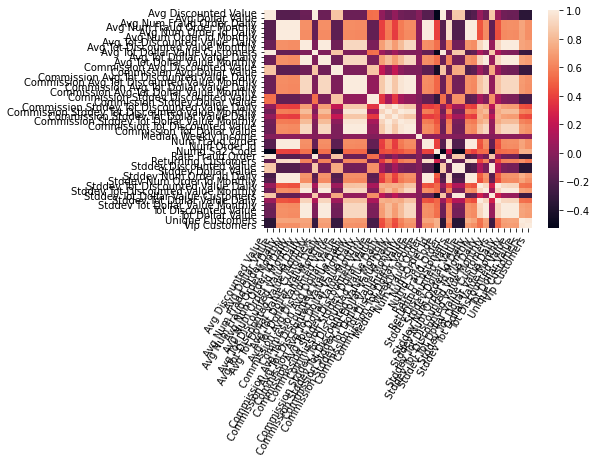

In [7]:
corr = final_df[final_df.columns.difference(['merchant_abn', 'take_rate'])].corr()

def capitalized_spaced(colname: str):
    return ' '.join([
        w.capitalize()
        for w in colname.split('_')
    ])
column_names = [capitalized_spaced(cn) for cn in corr.columns.values]

plt.figure()
hm = sns.heatmap(corr, 
    xticklabels=column_names,
    yticklabels=column_names)
plt.xticks(rotation=60, ha='right')
plt.yticks(rotation=0)
hm.figure.savefig(f'../plots/all-correlation.png', 
    bbox_inches = 'tight', dpi = 500)

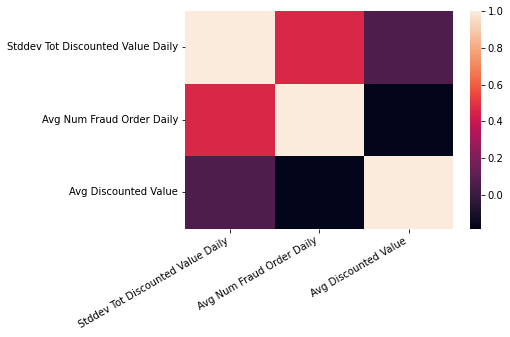

In [8]:
import seaborn as sns
# corr = final_df.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

for challenge, feature_list in feature_dict.items():
    corr = final_df[feature_list].corr()

    def capitalized_spaced(colname: str):
        return ' '.join([
            w.capitalize()
            for w in colname.split('_')
        ])
    column_names = [capitalized_spaced(cn) for cn in corr.columns.values]

    plt.figure()
    hm = sns.heatmap(corr, 
        xticklabels=column_names,
        yticklabels=column_names)
    plt.xticks(rotation=30, ha='right')
    plt.yticks(rotation=0)
    hm.figure.savefig(f'../plots/{challenge}-correlation.png', 
        bbox_inches = 'tight', dpi = 500)

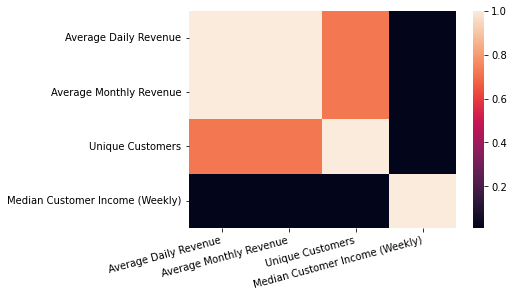

In [14]:
['merchant_abn', 'name', 'tags', 'tag', 'revenue_level', 'take_rate',
       'tot_dollar_value', 'avg_dollar_value', 'stddev_dollar_value',
       'tot_discounted_value', 'avg_discounted_value',
       'stddev_discounted_value', 'num_order_id', 'num_fraud_order',
       'rate_fraud_order', 'avg_tot_dollar_value_monthly',
       'stddev_tot_dollar_value_monthly', 'avg_tot_discounted_value_monthly',
       'stddev_tot_discounted_value_monthly', 'avg_num_order_id_monthly',
       'stddev_num_order_id_monthly', 'avg_num_fraud_order_monthly',
       'avg_tot_dollar_value_daily', 'stddev_tot_dollar_value_daily',
       'avg_tot_discounted_value_daily', 'stddev_tot_discounted_value_daily',
       'avg_num_order_id_daily', 'stddev_num_order_id_daily',
       'avg_num_fraud_order_daily', 'commission_tot_dollar_value',
       'commission_avg_dollar_value', 'commission_stddev_dollar_value',
       'commission_tot_discounted_value', 'commission_avg_discounted_value',
       'commission_stddev_discounted_value',
       'commission_avg_tot_dollar_value_monthly',
       'commission_stddev_tot_dollar_value_monthly',
       'commission_avg_tot_discounted_value_monthly',
       'commission_stddev_tot_discounted_value_monthly',
       'commission_avg_tot_dollar_value_daily',
       'commission_stddev_tot_dollar_value_daily',
       'commission_avg_tot_discounted_value_daily',
       'commission_stddev_tot_discounted_value_daily', 'numd_sa2_code',
       'median_weekly_income', 'returning_customers', 'unique_customers',
       'avg_tot_dollar_value_customers', 'stddev_tot_dollar_value_customers',
       'vip_customers']

corr = final_df[
    [
        'avg_tot_dollar_value_daily',
        'avg_tot_dollar_value_monthly',
        'unique_customers',
        'median_weekly_income'
    ]
].corr()

def capitalized_spaced(colname: str):
    return ' '.join([
        w.capitalize()
        for w in colname.split('_')
    ])
column_names = [capitalized_spaced(cn) for cn in corr.columns.values]

plt.figure()

ticklabels = [
    'Average Daily Revenue',
    'Average Monthly Revenue',
    'Unique Customers',
    'Median Customer Income (Weekly)'
]

hm = sns.heatmap(corr, 
    xticklabels=ticklabels,
    yticklabels=ticklabels)
plt.xticks(rotation=15, ha='right')
plt.yticks(rotation=0)
hm.figure.savefig(f'../plots/{"_".join(ticklabels)}-correlation.png', 
    bbox_inches = 'tight', dpi = 500)

In [10]:
final_df.columns

Index(['merchant_abn', 'name', 'tags', 'tag', 'revenue_level', 'take_rate',
       'tot_dollar_value', 'avg_dollar_value', 'stddev_dollar_value',
       'tot_discounted_value', 'avg_discounted_value',
       'stddev_discounted_value', 'num_order_id', 'num_fraud_order',
       'rate_fraud_order', 'avg_tot_dollar_value_monthly',
       'stddev_tot_dollar_value_monthly', 'avg_tot_discounted_value_monthly',
       'stddev_tot_discounted_value_monthly', 'avg_num_order_id_monthly',
       'stddev_num_order_id_monthly', 'avg_num_fraud_order_monthly',
       'avg_tot_dollar_value_daily', 'stddev_tot_dollar_value_daily',
       'avg_tot_discounted_value_daily', 'stddev_tot_discounted_value_daily',
       'avg_num_order_id_daily', 'stddev_num_order_id_daily',
       'avg_num_fraud_order_daily', 'commission_tot_dollar_value',
       'commission_avg_dollar_value', 'commission_stddev_dollar_value',
       'commission_tot_discounted_value', 'commission_avg_discounted_value',
       'commission_stdde

In [11]:
final_df[['merchant_abn', 'std_monthly_revenue', 'avg_monthly_rev']] \
    .sort_values('avg_monthly_rev').tail(1000).head(20)

KeyError: "['std_monthly_revenue', 'avg_monthly_rev'] not in index"

In [ ]:
final_df = final_df[final_df['revenue_level']  == 'e'] \
    .sort_values('std_monthly_revenue')

In [ ]:
print(final_df[['merchant_abn', 'std_monthly_revenue']].head(5))
print(final_df[['merchant_abn', 'std_monthly_revenue']].tail(5))

      merchant_abn  std_monthly_revenue
3403   36758807067           357.463515
1897   78080443264           385.171740
1676   79008028287           385.773815
652    59358011432           399.557235
2744   57079678065           407.557979
      merchant_abn  std_monthly_revenue
2686   33226000026         13557.994340
1293   34920839316         17630.259142
1919   83000061755         18311.942067
1136   67609108741         18514.686749
1074   41944909975        116651.465429


In [ ]:
print(final_df[final_df['num_orders'] > 100][['merchant_abn', 'std_monthly_revenue']].head(5))
print(final_df[final_df['num_orders'] > 100][['merchant_abn', 'std_monthly_revenue']].tail(5))

      merchant_abn  std_monthly_revenue
3403   36758807067           357.463515
1897   78080443264           385.171740
1676   79008028287           385.773815
652    59358011432           399.557235
2744   57079678065           407.557979
      merchant_abn  std_monthly_revenue
2686   33226000026         13557.994340
1293   34920839316         17630.259142
1919   83000061755         18311.942067
1136   67609108741         18514.686749
1074   41944909975        116651.465429
